In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv('../data/processed/cangas_IU_2013x.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data['fecha'] = pd.to_datetime(data['fecha'])

# Dividir los datos en características (X) y etiquetas (y)
X = data[['fecha', 'UI']]
y = data['abierto/cerrado']

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
X['dia'] = X['fecha'].dt.day
X['mes'] = X['fecha'].dt.month
X['año'] = X['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
X = X.drop('fecha', axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminar filas con valores NaN en los conjuntos de entrenamiento y prueba
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Asegurarse de que y_train tenga la misma longitud que X_train

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Asegurarse de que y_test tenga la misma longitud que X_test

Características más importantes en el modelo:
  feature  importance
2     mes    0.517816
3     año    0.234448
0      UI    0.135464
1     dia    0.112273


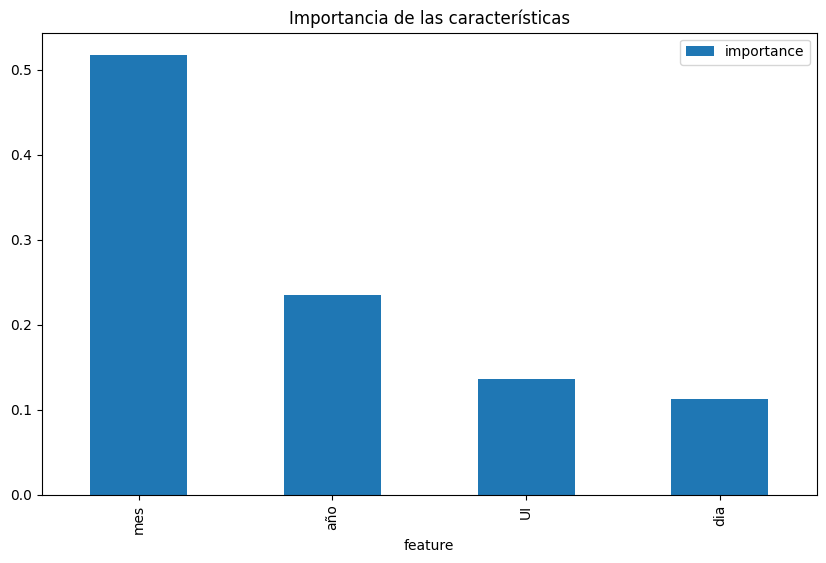

Precisión Árbol de Decisión: 97.23%


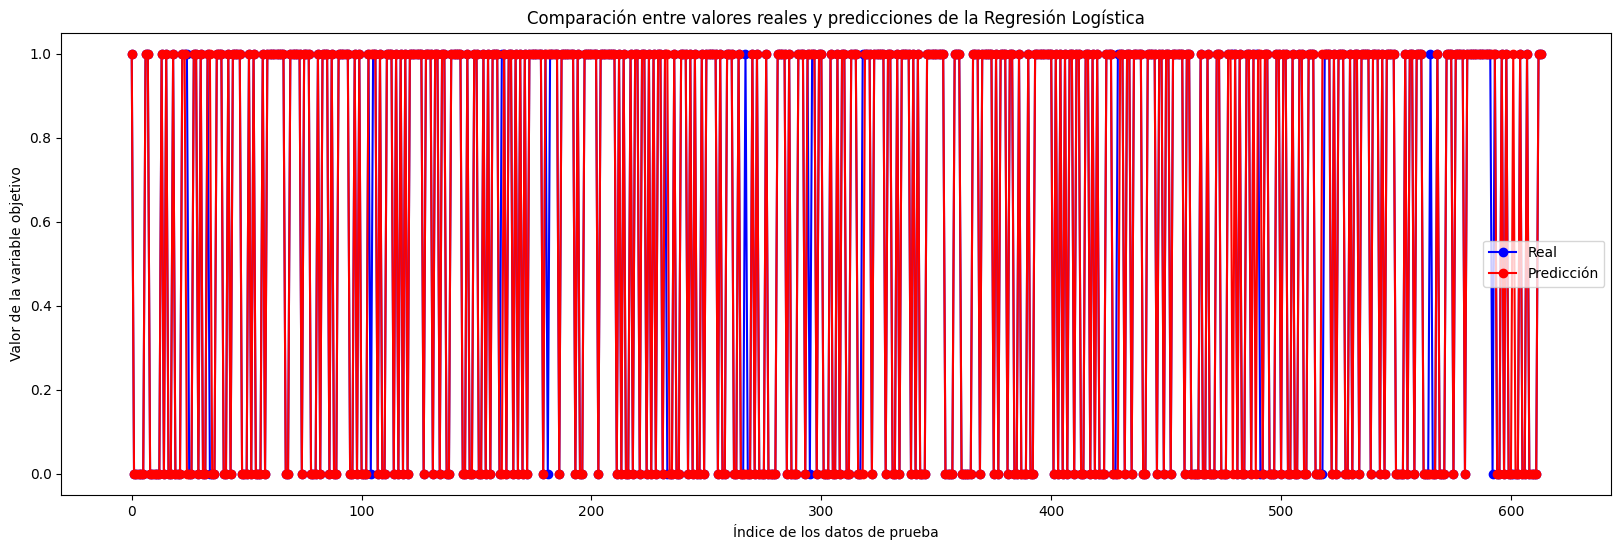

In [2]:

# Luego, puedes proceder con el entrenamiento y evaluación de los modelos.

from sklearn.ensemble import RandomForestClassifier
# Crear el modelo
decision_tree = RandomForestClassifier(random_state=14)


# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Características más importantes
feature_importances = decision_tree.feature_importances_
feature_names = X_train.columns

# Crear un dataframe con las características y sus importancias
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Ordenar el dataframe por importancia
importance_df = importance_df.sort_values(by='importance', ascending=False)

print("Características más importantes en el modelo:")
print(importance_df)

# Opcional: Graficar las importancias de las características
importance_df.plot.bar(x='feature', y='importance', figsize=(10, 6))
plt.title('Importancia de las características')
plt.show()

# Hacer predicciones
y_pred = decision_tree.predict(X_test)

# Calcular la precisión
precision_decision_tree = accuracy_score(y_test, y_pred)
print(f"Precisión Árbol de Decisión: {precision_decision_tree * 100:.2f}%")

# Graficar la diferencia entre valores reales y predicciones de la Regresión Logística
plt.figure(figsize=(20, 6))

# Graficar valores reales y predicciones
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones de la Regresión Logística')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()


Precisión de las predicciones en el conjunto de prueba: 43.48%


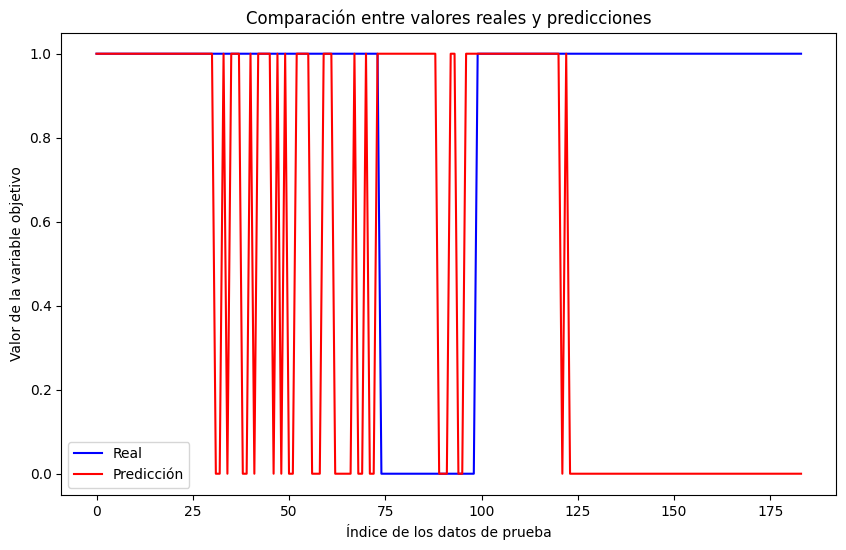

In [3]:
# Cargar el dataset
data2 = pd.read_csv('../data/processed/cangas_IU_2013.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop('fecha', axis=1)

data2 = data2.drop('abierto/cerrado', axis=1)
# Realizar la predicción usando el modelo entrenado
prediccion = decision_tree.predict(data2)

probabilidades = decision_tree.predict_proba(data2)

data3 = pd.read_csv('../data/processed/cangas_IU_2013.csv')

y_test_custom = data3['abierto/cerrado']

# Calcular la precisión
precision_custom = accuracy_score(y_test_custom, prediccion)
print(f"Precisión de las predicciones en el conjunto de prueba: {precision_custom * 100:.2f}%")

plt.figure(figsize=(10, 6))

# Graficar valores reales
plt.plot(y_test_custom.values, label='Real', color='blue', linestyle='-')

# Graficar predicciones
plt.plot(prediccion, label='Predicción', color='red', linestyle='-')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()

Epoch 1/50


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.5428 - loss: 67.3231
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.5179 - loss: 7.3745
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5295 - loss: 7.0074
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5407 - loss: 4.7323
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5480 - loss: 3.7595
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.5454 - loss: 3.7456
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.5641 - loss: 5.8484
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.5666 - loss: 4.0164
Epoch 9/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5542 - loss: 4.5014
Epoch 10/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.5628 - loss: 4.7748
Epoch 11/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5675 - loss: 3.9155
Epoch 12/50
246/246 ━━━━━━━━━━━━━━━━━━━━

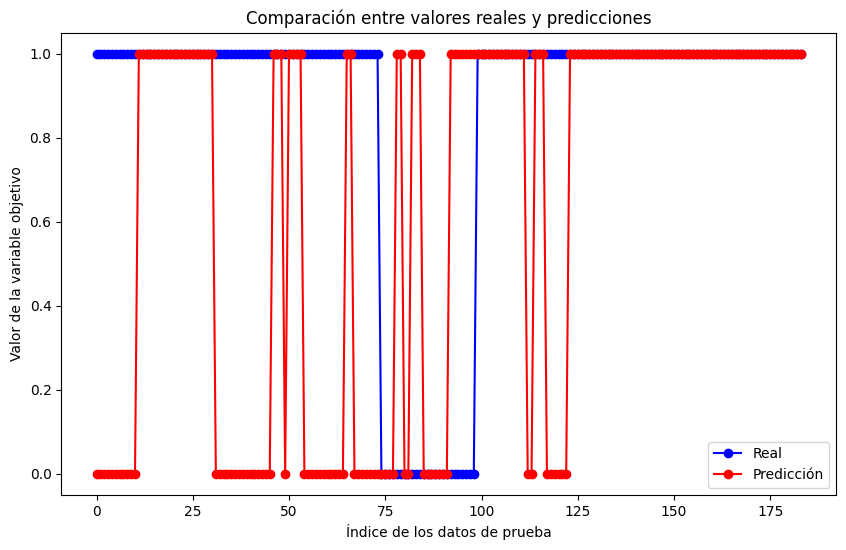

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Escalar las características
scaler = StandardScaler()
data2_scaled = scaler.fit_transform(data2)

# Cargar de nuevo el dataset para obtener y_train y y_test_custom
data3 = pd.read_csv('../data/processed/cangas_IU_2013.csv')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar el dataset
data2 = pd.read_csv('../data/processed/cangas_IU_2013.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop('fecha', axis=1)

# Eliminar la columna 'abierto/cerrado' ya que no se necesita en las características para la predicción
data2 = data2.drop('abierto/cerrado', axis=1)

# Escalar las características
scaler = StandardScaler()
data2_scaled = scaler.fit_transform(data2)

# Cargar de nuevo el dataset para obtener y_train y y_test_custom
data3 = pd.read_csv('../data/processed/cangas_IU_2013.csv')
y_test_custom = data3['abierto/cerrado']

# Crear el modelo de la Red Neuronal Artificial (RNA)
model = Sequential()
model.add(Dense(32, input_dim=data2_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Realizar la predicción usando el modelo entrenado
prediccion = model.predict(data2_scaled)
prediccion = (prediccion > 0.5).astype(int).flatten()

# Calcular la precisión
precision_custom = accuracy_score(y_test_custom, prediccion)
print(f"Precisión de las predicciones en el conjunto de prueba: {precision_custom * 100:.2f}%")

plt.figure(figsize=(10, 6))

# Graficar valores reales
plt.plot(y_test_custom.values, label='Real', color='blue', linestyle='-', marker='o')

# Graficar predicciones
plt.plot(prediccion, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()

